Some quantities invalid due to missing profile uncertaintyO4_psize, CoO_scale, CoO_delta2, CoO_a, CoO_Co1_Biso, CoO_O1_Biso, Al2CoO4_scale, Al2CoO4_delta2, Al2CoO4_a, Al2CoO4_Co1_Biso, Al2CoO4_Al1_Biso, Al2CoO4_Al2_Biso, Al2CoO4_Co2_Biso, Al2CoO4_O_Biso, Co3O4_scale, Co3O4_delta2, Co3O4_a, Co3O4_Co1_Biso, Co3O4_Co2_Biso, Co3O4_O1_Biso
Overall (Chi2 and Reduced Chi2 invalid)
------------------------------------------------------------------------------
Residual       208.83512784
Contributions  208.83512784
Restraints     0.00000000
Chi2           208.83512784
Reduced Chi2   0.07355940
Rw             0.28925776

Variables (Uncertainties invalid)
------------------------------------------------------------------------------
Al2CoO4_Al1_Biso  7.45602879e-01 +/- 8.11051149e+03
Al2CoO4_Al2_Biso  2.70499795e-01 +/- 3.23782864e+01
Al2CoO4_Co1_Biso  7.45382671e-01 +/- 1.28764685e+03
Al2CoO4_Co2_Biso  2.75640126e-01 +/- 1.10958034e+02
Al2CoO4_O_Biso    1.92375696e+00 +/- 3.39807875e-01
Al2CoO4_

Bad value in file 'https://raw.githubusercontent.com/BenjaminMD/MplStyle/main/style.rc', line 308 ('mathtext.fontset: "custom"'): Key mathtext.fontset: '"custom"' is not a valid value for mathtext.fontset; supported values are ['dejavusans', 'dejavuserif', 'cm', 'stix', 'stixsans', 'custom']; remove quotes surrounding your string
Bad value in file 'https://raw.githubusercontent.com/BenjaminMD/MplStyle/main/style.rc', line 309 ('mathtext.it:  "Source Serif Pro:italic"'): Key mathtext.it: Could not parse font string: '"Source Serif Pro:italic"'
Expected end of text, found '"'  (at char 24), (line:1, col:25)
Bad value in file 'https://raw.githubusercontent.com/BenjaminMD/MplStyle/main/style.rc', line 311 ('mathtext.bf:  "Source Serif Pro:bold"'): Key mathtext.bf: Could not parse font string: '"Source Serif Pro:bold"'
Expected end of text, found '"'  (at char 22), (line:1, col:23)


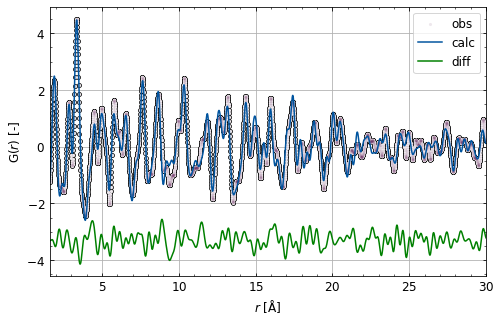

In [140]:
from ezfit import ezfit
from ezfit.rsc.get_gr import get_gr
from ezplot import single_pdf, plotdefaults, single_figure
from ezfit.diffpy_wrap import save_results
import matplotlib.pyplot as plt

data_file = '/home/cipmin/5_Felix/GitHub_EzFit/data/Co_Alox/SBa200-CoO-20.gr'

fit_pdf = ezfit.FitPDF(data_file, {
    #'Tetr_Al2O3': ['sheetCF', 'Al2O3'],
    'CoO': ['spheroidalCF', 'CoO'],
    'Al2CoO4': ['sheetCF', 'Al2CoO4'],
    'Co3O4': ['sphericalCF', 'Co3O4']
})
fit_pdf.update_recipe()

res = fit_pdf.run_fit()

r, gobs, gcalc, gdiff, baseline, gr_composition = get_gr(fit_pdf.recipe)

single_pdf(r, gcalc, gobs, 'test.pdf')
plt.savefig('./results/test')
name = data_file.split('/')[-1].split('.')[0]
save_results(fit_pdf.recipe, f'./results/{name}/', name, fit_pdf.phases)

{'Tetr_Al2O3': 'Al2O3', 'CoO': 'CoO', 'Al2CoO4': 'Al2CoO4', 'Co3O4': 'Co3O4'}

Bad value in file 'https://raw.githubusercontent.com/BenjaminMD/MplStyle/main/style.rc', line 308 ('mathtext.fontset: "custom"'): Key mathtext.fontset: '"custom"' is not a valid value for mathtext.fontset; supported values are ['dejavusans', 'dejavuserif', 'cm', 'stix', 'stixsans', 'custom']; remove quotes surrounding your string
Bad value in file 'https://raw.githubusercontent.com/BenjaminMD/MplStyle/main/style.rc', line 309 ('mathtext.it:  "Source Serif Pro:italic"'): Key mathtext.it: Could not parse font string: '"Source Serif Pro:italic"'
Expected end of text, found '"'  (at char 24), (line:1, col:25)
Bad value in file 'https://raw.githubusercontent.com/BenjaminMD/MplStyle/main/style.rc', line 311 ('mathtext.bf:  "Source Serif Pro:bold"'): Key mathtext.bf: Could not parse font string: '"Source Serif Pro:bold"'
Expected end of text, found '"'  (at char 22), (line:1, col:23)
/home/cipmin/anaconda3/envs/diffpy/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFor

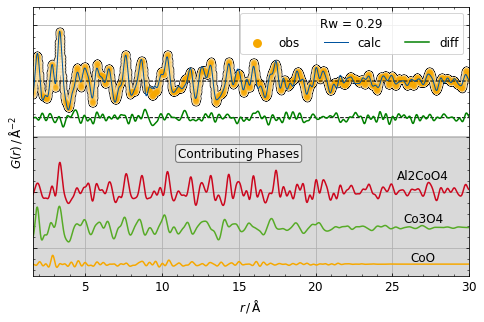

In [162]:
import numpy as np
fig, ax = single_figure('$r\,/\,\mathrm{\AA}$', '$G$($r$)$\,/\,\mathrm{\AA}^{-2}$')



def PDF(ax, r, gobs):
    ax.scatter(r, gobs, 36, "0.0", lw=1.5)
    ax.scatter(r, gobs, 36, "1.0", lw=0)
    ax.scatter(r, gobs, 35, "#f6a800", lw=0, alpha=0.1725)
    ax.scatter([], [], 80, "#f6a800", lw=0, label='obs')
    ax.plot(r, gcalc, '-', label='calc', linewidth=1.0)
    ax.plot(r, gdiff + baseline, '-', label='diff', color='green')
    ax.plot(r, np.zeros(len(r)) + baseline, '--', linewidth=1.0, color='black', zorder=-1)
    ax.plot(r, np.zeros(len(r)), '--',  color='black', linewidth=1.0, zorder=1)
    ax.set_xlim(r.min(), r.max())
    
    ax.legend(title=f'Rw = {res.rw:.2f}', ncol=3, loc='upper right')
PDF(ax, r, gobs)
gr_p = {}
ord = {}
for i, (name, gcalc_p) in enumerate(zip(fit_pdf.formulas.values(), gr_composition.values())):
    span = gcalc_p.min() - gcalc_p.max()
    ord[name] = span
    gr_p[name] = gcalc_p 

for i, name in enumerate(sorted(ord, key=ord.get)):
    ax.plot(r, gr_p[name] + baseline * (i + 3))
    ax.text(r.max()*0.9, gr_p[name][r  > r.max()* 0.8].max() + baseline * (i + 3), f'{name}', va='bottom', ha='center')
ax.set_ylim(gr_p[name].min()*1.5 + baseline * (i + 3) + baseline * 0.2, gcalc.max() * 1.5)
ax.axhspan(baseline * 1.5, -1000, color='black', zorder=-5, alpha=0.15)
ax.text(r.max()*0.5, baseline * 1.8, "Contributing Phases", va='top', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.5))
ax.set_yticklabels(['']*10)

plt.savefig('Test.svg')


In [69]:
gr_composition

{'Tetr_Al2O3() * Tetr_Al2O3sheetCF(r, Tetr_Al2O3_sthick)': array([-0.0571411 , -0.01952222,  0.01912459, ...,  0.08992252,
         0.08656625,  0.08346166]),
 'CoO() * CoOspheroidalCF(r, CoO_erad, CoO_prad)': array([-0.02034871, -0.01998966, -0.01960692, ...,  0.02409502,
         0.0232055 ,  0.02225354]),
 'Al2CoO4() * Al2CoO4sheetCF(r, Al2CoO4_sthick)': array([-0.05798625, -0.05442011, -0.05095577, ...,  0.19636153,
         0.20021287,  0.20208732]),
 'Co3O4() * Co3O4sphericalCF(r, Co3O4_psize)': array([-0.72895316, -0.73721809, -0.73840462, ...,  0.09463882,
         0.10136074,  0.11088931])}

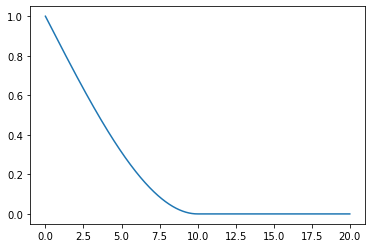

In [29]:
import numpy 
import matplotlib.pyplot as plt


def sphericalCF(r, psize):
    """Spherical nanoparticle characteristic function.

    r       --  distance of interaction
    psize   --  The particle diameter

    From Kodama et al., Acta Cryst. A, 62, 444-453
    (converted from radius to diameter)

    """
    f = numpy.zeros(numpy.shape(r), dtype=float)
    if psize > 0:
        x = numpy.array(r, dtype=float) / psize
        inside = (x < 1.0)
        xin = x[inside]
        f[inside] = 1.0 - 1.5*xin + 0.5*xin*xin*xin
    return f

r = numpy.linspace(0, 20, 1000)
psize = 10
f = sphericalCF(r, psize)
plt.plot(r, f)

In [3]:
class A():
    def print_mssg(self):
        print('Hello')


class B(A):
    def __init__(self) -> None:
        self.print_mssg()
b = B()

b

Hello


In [60]:
import pandas as pd
import numpy as np
from scipy.constants import c, e, m_e, epsilon_0, pi
from glob import glob


class GetScales():
    '''
    Class

    '''
    def __init__(self, fit_pdf, xray_energy):
        self.xray_energy = xray_energy
        self.fit_pdf = fit_pdf
        self.phases = self.fit_pdf.phases
        self.cifs = self.fit_pdf.cif_files

    def get_scales(self):
        '''
        Function
        '''
        self.scales = {}
        for phase in self.phases:
            cif = self.cifs[phase]
            scale = getattr(fit_pdf.recipe, phase + '_scale').value
            self.scales[phase] = scale
        return self.scales

    def get_cifs(self):
        self.cif_contents = {}
        for phase in self.phases:
            with open(self.cifs[phase], 'r') as f:
                lines = f.readlines()
            lines = [line.strip() for line in lines]
            self.cif_contents[phase] = lines
        return self.cif_contents


    def get_cell_volume(self):
        """
        -----
        ToDo:
        if _cell_volume not found, calculate from lat params
        """
        self.cell_volume = {}
        tag = '_cell_volume'
        for phase in self.phases:
            lines = self.cif_contents[phase]
            cell_line = [i for i in lines if i.startswith(tag)]
            self.cell_volume[phase] = float(cell_line[0].split()[-1].split('(')[0])
            self.cell_volume[phase] = self.cell_volume[phase] * 10**-30
        return self.cell_volume


    def get_sym_constraints(self):
        """
        args:
        cif_file
        returns:
        symmetrie operations
        """
        self.transforms = {}
        for phase in self.phases:
            lines = self.cif_contents[phase]
            xyz_index1 = [i for i, l in enumerate(lines) if '_xyz' in l]
            xyz_index2 = [i for i, l in enumerate(lines) if i > xyz_index1[0] and 'loop_' in l]
            xyz_lines = lines[xyz_index1[0]+1:xyz_index2[0]]
            if '_space_group_symop_id' in lines:
                xyz_lines = [xyz[len(f'{i+1}'):] for i, xyz in enumerate(xyz_lines)]
            for ch in [' ', '\t', "'"]:
                xyz_lines = [line.replace(ch, '') for line in xyz_lines] 
            self.transforms[phase] = [lambda x, y, z, coef=i: eval(f'[{coef}]') for i in xyz_lines] 
        return self.transforms


    def get_fract_cord(self):
        """
        args:
        cif_file
        returns:
        dataframe with fractional coordinates
        """
        self.fract_cord = {}
        for phase in self.phases:
            lines = self.cif_contents[phase]
            site_ind = [
                ind for ind, line in enumerate(lines) if '_atom_site_' in line
            ]
            site_slice = slice(site_ind[0], site_ind[-1]+1)
            col_names = [line.split('_atom_site_')[-1] for line in lines[site_slice]]
            l_site = site_ind[-1] + 1
            number_symb_ind = [l_site + i for i, line in enumerate(lines[l_site + 1:])
                            if '#' in line]
            if number_symb_ind:
                data = [line.split() for line in lines[site_ind[-1]+1:number_symb_ind[0]] if line != '']
            else:
                data = [line.split() for line in lines[site_ind[-1]+1:] if line != '']
            self.fract_cord[phase] = pd.DataFrame(data, columns=col_names)
        return self.fract_cord


    def gen_site_pos(self):
        """
        args:
        df: dataframe with fractional coordinates,
        transforms: symmetrie operations
        returns:
        site_pos: dictionary with phase as keys, labels as keys and fractional coordinates as values
        """
        self.site_pos = {}
        for phase in self.phases:
            self.site_pos[phase] = {}
            for lab in self.fract_cord[phase].label.unique(): 
                row = self.fract_cord[phase].loc[self.fract_cord[phase].label == lab, :]
                x, y, z = [row[xyz].to_numpy()[0]
                        for xyz in ['fract_x', 'fract_y', 'fract_z']]
                x, y, z = [float(i.split('(')[0]) for i in [x, y, z]]
                frac = np.unique([t(x, y, z) for t in self.transforms[phase]], axis=0)
                frac = frac % 1
                for i, (x, y, z) in enumerate(frac):
                    x = round(x, 4)
                    y = round(y, 4)
                    z = round(z, 4)
                    frac[i] = [x, y, z]
                frac = np.unique(frac, axis=0)
                self.site_pos[phase][lab] = frac
        return self.site_pos


    def count_atom(self):
        """
        args: 
        df: dataframe with fractional coordinates,
        site_pos: dictionary with labels as keys and fractional coordinates as values
        returns:
        atom_mult: dictionary with phase as key, labels as keys and number of atoms as values
        """
        self.atom_mult = {}
        for phase in self.phases:
            self.atom_mult[phase] = {}
            for label, pos in self.site_pos[phase].items():
                self.atom_mult[phase][label] = np.array(pos).shape[0]
            for label, occ in zip(self.fract_cord[phase].label, self.fract_cord[phase].occupancy):
                self.atom_mult[phase][label] *= float(occ)
        return self.atom_mult


    def get_number_density(self):
        """
        args:
        cell_volume
        atom_multiplicity
        returns:
        n_x: number density of element x
        """
        self.number_dens = {}
        for phase in self.phases:
            n = 0 #n = total amount of atoms
            n_x = list(self.atom_mult[phase].values()) #number of element x in unit cell
            dens = sum(n_x) / self.cell_volume[phase]
            self.number_dens[phase] = dens
        return self.number_dens


    def get_xray_scat_len(self):
        """
        args: 
        atom_multiplicity: we get the atom label and use it to track the atomic form factor
        xray_energy: still needs to be put in manually
        returns:
        f1: dictionary, keys = phases, values = list of real part of atomic form factor for each atom site
        b1: dictionary, keys = phases, values = list of scattering length for each atom site
        """
        f1 = {}
        self.b1 = {}
        elements = {}
        for phase in self.phases:
            elements[phase] = []
            f1[phase] = []
            self.b1[phase] = []
            for keys in self.atom_mult[phase]:
                element = str()
                for symbol in keys:
                    if symbol.isalpha():
                        element += symbol
                elements[phase].append(element)
            for element in elements[phase]:
                file_path = glob(f'/home/cipmin/5_Felix/GitHub_EzFit/ezfit/rsc/f1/*{element}*')[0]
                _, element_keV, element_f1 = np.loadtxt(
                    file_path, skiprows=1, delimiter=',').T
                f = np.interp([self.xray_energy],  element_keV, element_f1)[0]
                bi = e**2 / (4 * pi * epsilon_0 * m_e * c**2) * f
                #print('f', f, 'bi', bi)
                f1[phase].append(f)
                self.b1[phase].append(bi)
        return self.b1


    def get_avg_scat_len(self):
        """
        args:
        b1
        atom_mult
        returns:
        avg_scat_len: dictionary with phase as keys and average scatter length of unit cell as values
        """
        self.avg_scat_len = {}
        n = {} #n = total amount of atoms
        f_sum = {}  #sum of scattering length
        for phase in self.phases:
            self.avg_scat_len[phase] = 0
            n[phase] = 0
            f_sum[phase] = 0
            n_x = list(self.atom_mult[phase].values()) #number of element x in unit cell
            for i in range(len(self.b1[phase])):
                f_sum[phase] += self.b1[phase][i] * n_x[i]
                n[phase] += n_x[i]
            #print('f_sum', f_sum, 'n', n)
            self.avg_scat_len[phase] = f_sum[phase] / n[phase]
        return self.avg_scat_len
        
    def get_real_scales(self):
        """
        args: 
        scale
        avg_scat_len
        number_dens
        returns:
        real_scale
        """
        self.real_scales = {}
        s = {}
        for phase in self.phases:
            s[phase] = self.scales[phase] / (self.number_dens[phase] * self.avg_scat_len[phase]**2)
        sum_scales = sum(s.values())
        for phase in self.phases:
            self.real_scales[phase] = s[phase] / sum_scales
        return self.real_scales
        


a = GetScales(fit_pdf, 8)
a.get_cifs()
a.get_scales()
a.get_cell_volume()
a.get_sym_constraints()
a.get_fract_cord()
a.gen_site_pos()
a.count_atom()
a.get_number_density()
a.get_xray_scat_len()
a.get_avg_scat_len()
a.get_real_scales()

{'Al2CoO4': 0.3906856191036282, 'Tetr_Al2O3': 0.6093143808963718}